In [33]:
import time
import numpy as np
import matplotlib.pyplot as plt

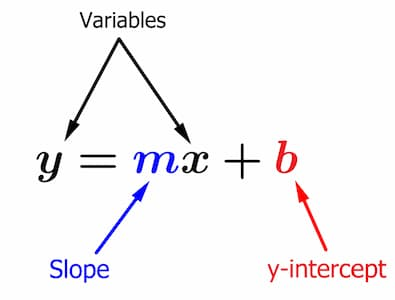

### The Line: $y = mx + b$

* **$y$**: Dependent variable (The output/prediction).
* **$x$**: Independent variable (The input feature).
* **$m$**: Slope (Determines the steepness and direction).
* **$b$**: y-intercept (Where the line crosses the vertical axis).

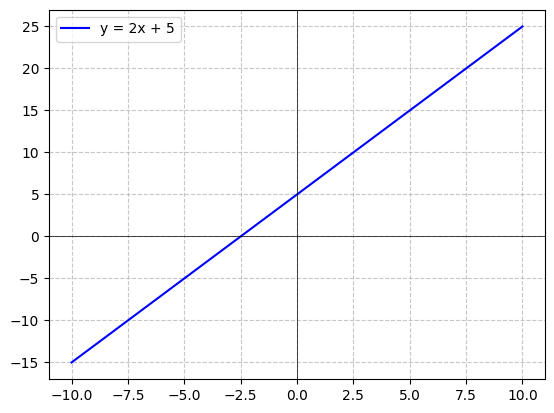

In [34]:
# Variables you can control
m = 2
b = 5

# Data generation
x = np.linspace(-10, 10, 100)
y = m * x + b

# Plotting
_ = plt.plot(x, y, label=f'y = {m}x + {b}', color='blue')
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)
_ = plt.grid(True, linestyle='--', alpha=0.7)
_ = plt.legend()

### Adding Noise

To simulate real-world data for regression, we add a random "error" ($\epsilon$) to our perfect line.

* **Equation**: $y = mx + b + \epsilon$
* **$\epsilon$ (Epsilon)**: Random noise/error.
* **Goal**: Find the original line $(m, b)$ despite the scattered data.

**Actual vs. Predicted**

* **$y_{true}$**: The noisy data points (Red dots).
* **$y_{pred}$**: The line's output for a given $x$ (Blue line).

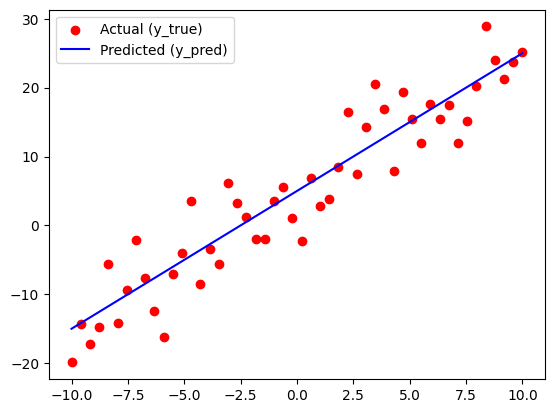

In [35]:
# Setup
m, b = 2, 5
x = np.linspace(-10, 10, 50)

# True Values (Noisy Data)
y_true = m * x + b + (np.random.randn(50) * 4)

# Predicted Values (The Line)
y_pred = m * x + b

# Plotting
_ = plt.scatter(x, y_true, color='red', label='Actual (y_true)')
_ = plt.plot(x, y_pred, color='blue', label='Predicted (y_pred)')
_ = plt.legend()

### Residuals

* **Definition**: $y_{true} - y_{pred}$.
* **Visual**: Vertical lines showing the "error" for each point.

**Metrics**

* **Mean Error**: Average of residuals. Positive and negative values cancel out.
* **Mean Squared Error (MSE)**: Average of squared residuals.
* **Root Mean Squared Error (RMSE)**: Square root of MSE. Represents the average error in the same units as $y$.

Mean Error: -0.39
Mean Squared Error (MSE): 14.43
Root Mean Squared Error (RMSE): 3.80


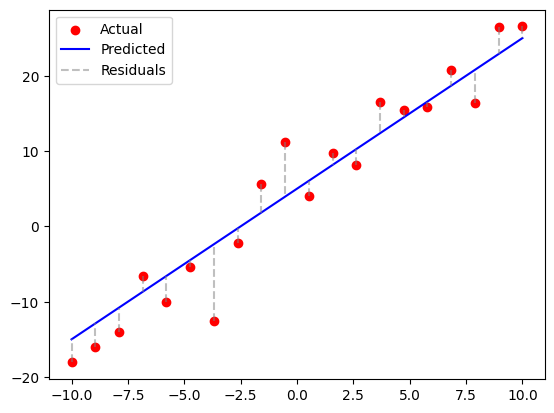

In [36]:
m, b = 2, 5
x = np.linspace(-10, 10, 20)
y_true = m * x + b + (np.random.randn(20) * 4)
y_pred = m * x + b

# Metrics
residuals = y_true - y_pred
mse = np.mean(residuals**2)

print(f"Mean Error: {np.mean(residuals):.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")

# Plotting
_ = plt.scatter(x, y_true, color='red', label='Actual')
_ = plt.plot(x, y_pred, color='blue', label='Predicted')
_ = plt.vlines(x, y_true, y_pred, color='gray', linestyle='--', alpha=0.5, label='Residuals')
_ = plt.legend()

### Scenario: Height Prediction

* **Data**: Age and Height measurements of 20 individuals.
* **Goal**: Build a model to predict Height ($y$) given Age ($x$).
* **Model**: Linear Regression (Simplest approach).

**Key Parameters**

* **Slope ($m$)**: Growth rate (How much height increases per year).
* **Intercept ($b$)**: Base height (Theoretical height at Age 0).

**Setup**

* **Independent Variable ($x$)**: Age (Years).
* **Target ($y$)**: Height (cm).
* **Goal**: Evaluate 3 manual guesses for slope ($m$) and intercept ($b$).
* **Visuals**: 3 subplots showing the guessed lines and their residuals.

Guess 1 (m=3, b=80):
  Mean Error: 12.45
  MSE:        562.05
  RMSE:       23.71

Guess 2 (m=5, b=65):
  Mean Error: 4.45
  MSE:        208.55
  RMSE:       14.44

Guess 3 (m=7, b=40):
  Mean Error: 6.45
  MSE:        278.05
  RMSE:       16.67



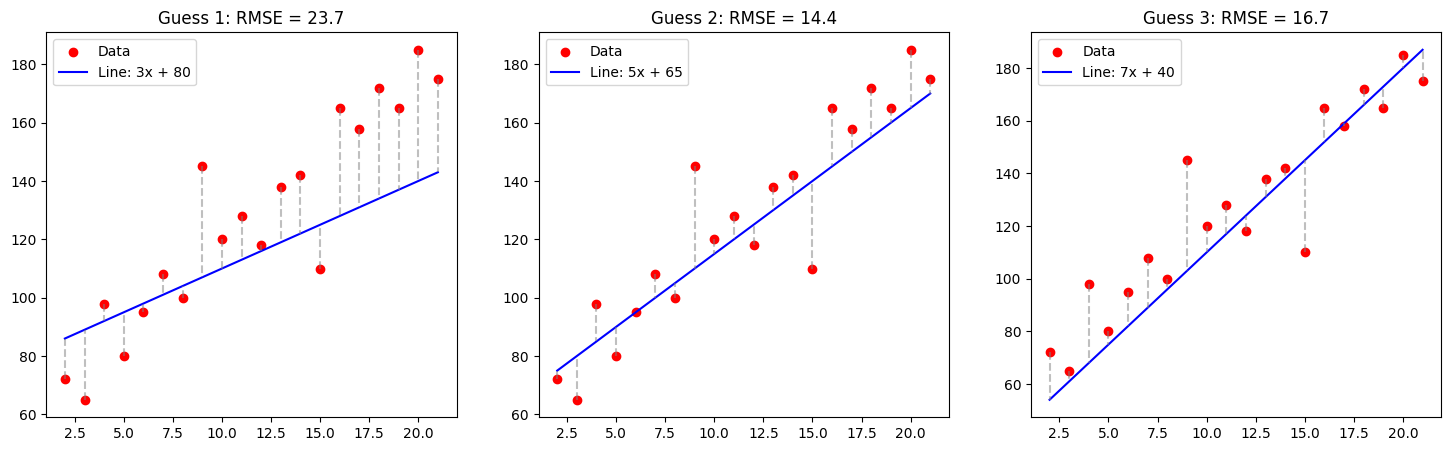

In [37]:
# 1. Hardcoded Data (20 samples)
age = np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
height = np.array([72,  65,  98,  80,  95, 108, 100, 145, 120, 128,
                   118, 138, 142, 110, 165, 158, 172, 165, 185, 175])

# 2. Manual Guesses (m, b)
guesses = [(3, 80), (5, 65), (7, 40)]  # Guess 1, Guess 2, Guess 3

# 3. Plotting & Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (m, b) in enumerate(guesses):
  # Predictions & Residuals
  y_pred = m * age + b
  residuals = height - y_pred

  # Metrics
  mse = np.mean(residuals**2)
  print(f"Guess {i+1} (m={m}, b={b}):")
  print(f"  Mean Error: {np.mean(residuals):.2f}")
  print(f"  MSE:        {mse:.2f}")
  print(f"  RMSE:       {np.sqrt(mse):.2f}\n")

  # Plot
  _ = axes[i].scatter(age, height, color='red', label='Data')
  _ = axes[i].plot(age, y_pred, color='blue', label=f'Line: {m}x + {b}')
  _ = axes[i].vlines(age, height, y_pred, color='gray', linestyle='--', alpha=0.5)
  _ = axes[i].set_title(f'Guess {i+1}: RMSE = {np.sqrt(mse):.1f}')
  _ = axes[i].legend()

### Brute Force Approach

**Pairwise Iteration**

* **Strategy**: Calculate the line connecting every possible pair of points ($N^2$ iterations).
* **Two-Point Formula**:
    * $m = \frac{y_2 - y_1}{x_2 - x_1}$
    * $b = y_1 - m x_1$
* **Limitations**:
    * **Inefficient**: Checks 400 combinations for just 20 points.
    * **Sub-optimal**: Assumes the "best" line perfectly passes through at least two data points (often false).

In [38]:
best_rmse = float('inf')
best_m, best_b = 0, 0

# Iterate through all unique pairs
for i in range(len(age)):
  for j in range(len(age)):
    if i == j:
      continue

    # 1. Calculate m and b for this pair
    x1, y1 = age[i], height[i]
    x2, y2 = age[j], height[j]

    if x2 - x1 == 0:
      continue  # Skip vertical lines

    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # 2. Calculate RMSE for this line against ALL points
    y_pred = m * age + b
    rmse = np.sqrt(np.mean((height - y_pred)**2))

    # 3. Store if best
    if rmse < best_rmse:
      best_rmse = rmse
      best_m, best_b = m, b

print(f"Best Pairwise Fit:")
print(f"  Slope (m):     {best_m:.4f}")
print(f"  Intercept (b): {best_b:.4f}")
print(f"  RMSE:          {best_rmse:.4f}")

Best Pairwise Fit:
  Slope (m):     5.7273
  Intercept (b): 60.6364
  RMSE:          13.2483


### Optimal Solution with Scikit-Learn

**Linear Regression**

* **Method**: Ordinary Least Squares (OLS).
* **Advantage**: Analytically finds the global minimum error (optimal line).
* **Guarantees**: The best possible $m$ and $b$ for the given data (lowest MSE).

In [39]:
from sklearn.linear_model import LinearRegression

# Data Reshaping (sklearn requires 2D array for X)
X = age.reshape(-1, 1)
y = height

# Model Training
model = LinearRegression()
model.fit(X, y)

# Parameters
m = model.coef_[0]
b = model.intercept_

# Evaluation
y_pred = model.predict(X)
rmse = np.sqrt(np.mean((y - y_pred)**2))

print(f"Scikit-Learn Optimal Fit:")
print(f"  Slope (m):     {m:.4f}")
print(f"  Intercept (b): {b:.4f}")
print(f"  RMSE:          {rmse:.4f}")

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Scikit-Learn Optimal Fit:
  Slope (m):     5.6414
  Intercept (b): 62.0744
  RMSE:          13.2314


### OLS Implementation (From Scratch)

**Steps: Ordinary Least Squares (OLS)**

1. **Calculate Means**: $\bar{x}$ (mean of age), $\bar{y}$ (mean of height).
2. **Calculate Deviations**: 
   * $d_x = x - \bar{x}$
   * $d_y = y - \bar{y}$
3. **Calculate Slope ($m$)**: 
   * Formula: $m = \frac{\sum(d_x \cdot d_y)}{\sum(d_x^2)}$
   * Logic: Covariance of $x, y$ divided by Variance of $x$.
4. **Calculate Intercept ($b$)**: 
   * Formula: $b = \bar{y} - m\bar{x}$

In [40]:
x_mean = np.mean(age)
y_mean = np.mean(height)

# Calculate terms for slope
numerator = np.sum((age - x_mean) * (height - y_mean))
denominator = np.sum((age - x_mean)**2)

# Calculate parameters
m = numerator / denominator
b = y_mean - (m * x_mean)

# Metrics
y_pred = m * age + b
rmse = np.sqrt(np.mean((height - y_pred)**2))

print(f"Manual OLS Fit:")
print(f"  Slope (m):     {m:.4f}")
print(f"  Intercept (b): {b:.4f}")
print(f"  RMSE:          {rmse:.4f}")

Manual OLS Fit:
  Slope (m):     5.6414
  Intercept (b): 62.0744
  RMSE:          13.2314


### How Simple OLS Works

**1. The Simple Formula logic**

* **Math derivation**: It comes from calculus. We take the MSE equation ($E = \frac{1}{n}\sum(y - (mx+b))^2$), take partial derivatives with respect to $m$ and $b$, set them to 0, and solve.
* **Intuitive View**:
    * **Numerator**: $\sum(x-\bar{x})(y-\bar{y})$ $\approx$ **Covariance**. Measures how much $x$ and $y$ move *together*.
    * **Denominator**: $\sum(x-\bar{x})^2$ $\approx$ **Variance**. Measures how much $x$ spreads out.
    * **Ratio**: We are scaling the "co-movement" by the "spread of x".

**2. Does it work for 2 or 3 features?**

* **Short Answer**: **No.**
* **Reason**: 
    * The simple formula assumes a 2D plane (1 input, 1 output). 
    * With 2 features ($x_1, x_2$), you are fitting a **Plane** in 3D space, not a line.
    * With 3+ features, you are fitting a **Hyperplane**.
    * You cannot use a single scalar division. You must use **Linear Algebra (Matrices)**.

### The Normal Equation

**To handle 1, 2, or $N$ features, we switch to matrix notation.**

$$\beta = (X^T X)^{-1} X^T y$$

* **$X$**: The input matrix (Design Matrix). Rows are samples, columns are features.
* **$y$**: The target vector.
* **$\beta$**: The vector of coefficients (slopes for each feature + intercept).

In [41]:
# --- 1. The Simple Way (One Feature only) ---
# Works ONLY for y = mx + b
def simple_ols(x, y):
  num = np.sum((x - np.mean(x)) * (y - np.mean(y)))
  den = np.sum((x - np.mean(x))**2)
  m = num / den
  b = np.mean(y) - m * np.mean(x)
  return m, b  # Returns m, b


# --- 2. The General Way (Any number of features) ---
# Works for y = w1*x1 + w2*x2 + ... + b
def general_ols_matrix(X, y):
  # Add Intercept (Bias) column of 1s
  intercept_col = np.ones((len(X), 1))
  X = np.c_[intercept_col, X]

  # Normal Equation: (X.T * X)^-1 * X.T * y
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta  # Returns [intercept, slope1, slope2, ...]

In [42]:
# 1. Data (2 Features: Age, Weight)
age = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
weight = np.array([12, 14, 16, 19, 22, 25, 28, 32, 35, 38,
                   42, 45, 50, 55, 60, 63, 68, 70, 75, 78])
height = np.array([72, 65, 98, 80, 95, 108, 100, 145, 120, 128,
                   118, 138, 142, 110, 165, 158, 172, 165, 185, 175])

# 2. Preparation
X = np.column_stack((age, weight))  # Shape: (20, 2)

# 3. Training
theta = general_ols_matrix(X, height)
print(f"Params: Intercept={theta[0]:.2f}, Age_w={theta[1]:.2f}, Weight_w={theta[2]:.2f}")

# 4. Prediction
# Add 1s col to match theta shape (intercept + 2 weights)
intercept_col = np.ones((len(X), 1))
X_b = np.c_[intercept_col, X]
y_pred = X_b @ theta

# 5. Evaluation
rmse = np.sqrt(np.mean((height - y_pred)**2))
print(f"RMSE: {rmse:.4f}")

Params: Intercept=62.25, Age_w=6.57, Weight_w=-0.26
RMSE: 13.2232


### OLS vs. Gradient Descent

**1. Ordinary Least Squares (OLS)**

* **Mechanism**: Analytical Solution (Math formula jumps straight to the answer).
* **Pros**: Guarantees exact optimal solution; No tuning required.
* **Cons**: Computationally expensive for large datasets. Inverting matrices is slow ($O(n^3)$).
* **Use Case**: Small to medium data.

**2. Gradient Descent (GD)**

* **Mechanism**: Iterative Optimization (Steps "downhill" to find the bottom).
* **Pros**: Highly scalable; Memory efficient.
* **Cons**: Approximate (converges to optimal); Requires tuning (Learning Rate).
* **Use Case**: Big Data / Deep Learning.


### Gradient Descent Implementation

**Gradient Descent (Batch)**

* **Logic**: Iteratively adjust weights ($w$) to minimize error.
* **Update Rule**: $w = w - \alpha \cdot \nabla J(w)$
    * $\alpha$ (Alpha): Learning Rate (Step size).
    * $\nabla J$ (Gradient): Direction of steepest increase in error.
* **Formula**: $w_{new} = w_{old} - \alpha \cdot \frac{2}{n} X^T (Xw - y)$

In [43]:
def gradient_descent(X, y, lr=0.0001, epochs=100000):
  # Add Intercept (Bias) column of 1s
  intercept_col = np.ones((len(X), 1))
  X_b = np.c_[intercept_col, X]
  m, n = X_b.shape

  theta = np.zeros(n)  # Initialize weights

  for _ in range(epochs):
    prediction = X_b.dot(theta)
    error = prediction - y
    gradient = (2/m) * X_b.T.dot(error)
    theta = theta - lr * gradient

  return theta

In [44]:
# 1. Data (2 Features: Age, Weight)
age = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
weight = np.array([12, 14, 16, 19, 22, 25, 28, 32, 35, 38,
                   42, 45, 50, 55, 60, 63, 68, 70, 75, 78])
height = np.array([72, 65, 98, 80, 95, 108, 100, 145, 120, 128,
                   118, 138, 142, 110, 165, 158, 172, 165, 185, 175])

# 2. Preparation
X = np.column_stack((age, weight))

# 3. Training
theta = gradient_descent(X, height, lr=0.0001, epochs=100000)
print(f"Params: Intercept={theta[0]:.2f}, Age_w={theta[1]:.2f}, Weight_w={theta[2]:.2f}")

# 4. Prediction
# Add 1s col to match theta shape (intercept + 2 weights)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred = X_b @ theta

# 5. Evaluation
rmse = np.sqrt(np.mean((height - y_pred)**2))
print(f"RMSE: {rmse:.4f}")

Params: Intercept=60.91, Age_w=6.15, Weight_w=-0.12
RMSE: 13.2374


### Benchmarking: OLS vs GD

In [45]:
# 1. Synthetic Data (Large)
n_rows = 100
n_cols = 10**4

X = np.random.randn(n_rows, n_cols)
y = np.random.randn(n_rows)

# 2. Benchmark
print(f"Starting OLS on {n_rows:,} x {n_cols:,} matrix...")
start = time.time()
theta = general_ols_matrix(X, y)
end = time.time()

print(f"Execution Time: {(end - start) * 1000:.4f} ms")
print(f"Coefficients: {theta.shape[0]}")

Starting OLS on 100 x 10,000 matrix...
Execution Time: 63745.5335 ms
Coefficients: 10001


In [46]:
# 1. Synthetic Data
n_rows = 100
n_cols = 10**4

X = np.random.randn(n_rows, n_cols)
y = np.random.randn(n_rows)

# 2. Benchmark
print(f"Starting GD on {n_rows:,} x {n_cols:,} matrix ({100} epochs)...")
start = time.time()
theta = gradient_descent(X, y, lr=0.01, epochs=100)
end = time.time()

print(f"Execution Time: {(end - start) * 1000:.4f} ms")

Starting GD on 100 x 10,000 matrix (100 epochs)...
Execution Time: 207.9487 ms
